### Importation des fichiers JSON

In [1]:
import json

business = []
users = []
reviews = []

with open('business.json', 'r', encoding='utf-8') as file:
    for line in file:
        business.append(json.loads(line))

with open('user.jsonl', 'r', encoding='utf-8') as file:
    for line in file:
        users.append(json.loads(line))

with open('review.jsonl', 'r', encoding='utf-8') as file:
    for line in file:
        reviews.append(json.loads(line))

In [2]:
print(f'Nombre de ligne dans le fichier business.json : {len(business)}')
print(f'Nombre de ligne dans le fichier reviews.json : {len(reviews)}')
print(f'Nombre de ligne dans le fichier users.json : {len(users)}')

Nombre de ligne dans le fichier business.json : 150346
Nombre de ligne dans le fichier reviews.json : 1000000
Nombre de ligne dans le fichier users.json : 558095


Le but est d'analyser la répartition des avis en fonction de différents facteurs

### Répartition des avis par catégorie

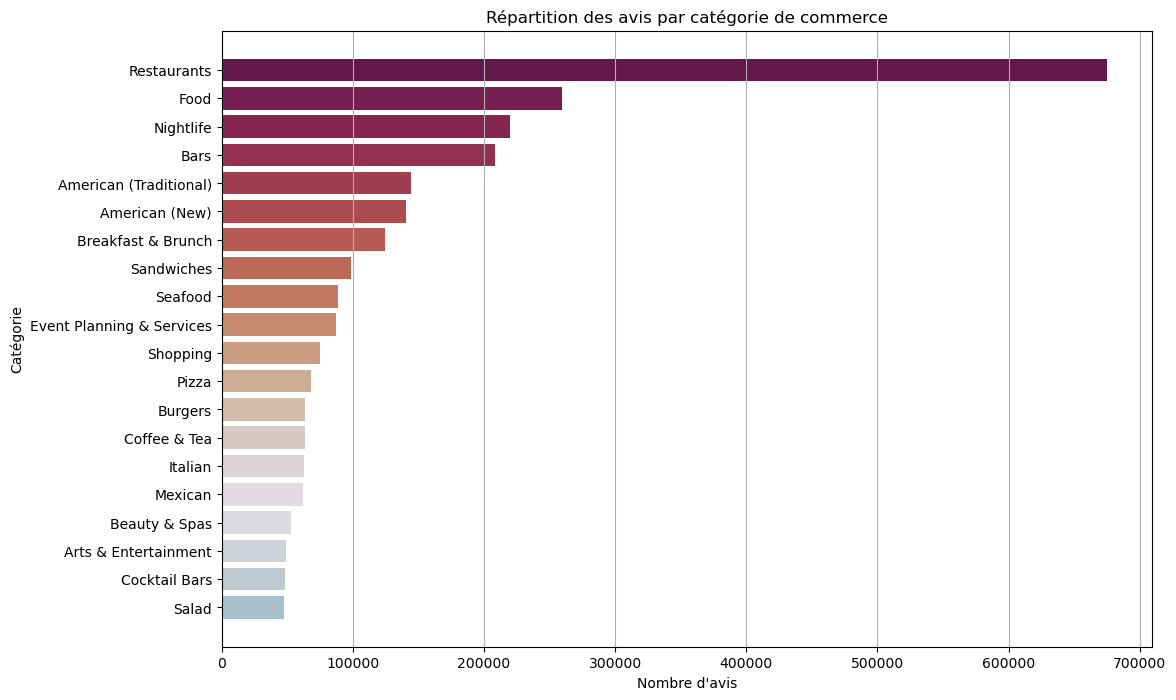

In [8]:
# Préparation des données
business_categories = {} # dictionnaire bussiness -> categories

# pour chaque commerce dans business faire
for b in business:
    id = b["business_id"] # récupérer l'identifiant du commerce
    categories = b["categories"] # récupérer la/les catégorie(s) du commerce
    if categories != None: # si le commerce n'est pas null
        business_categories[id] = categories # stocker dans le dictionnaire business_categories l'identifiant du commerce associé aux catégories

category_count = {} # compteur de catégories

# Comptage
# pour chaque avis dans reviews faire
for r in reviews:
    business_id = r["business_id"] # récupérer l'identifiant du commerce
    if business_id in business_categories.keys(): # si l'identifiant du commerce se trouve dans le dictionnaire créé précédemment
        cats = business_categories[business_id] # récupérer la liste des catégories
        if cats != None: # si la liste des catégories n'est pas null
            cats = [c.strip() for c in cats.split(',')] # séparer les catégories
            for c in cats: # pour chaque catégorie faire
                if c in category_count.keys(): # si la catégorie existe dans le dictionnaire category_count
                    category_count[c] += 1 # incrémenter le nombre de fois où on retrouve la catégorie
                else: # sinon
                    category_count[c] = 1 # initialiser le nombre à 1

# Préparation pour la visualisation
some_categories = sorted(category_count.items(), key=lambda x: x[1], reverse=True)[:20] # category_count.items retourne des tuples (catégories, counts)
                                                                                        # pour trier par le count, il faut utiliser key=lambda x: x[1]
categories_list = [some_categories[i][0] for i in range(len(some_categories))] # noms des catégories
counts_list = [some_categories[i][1] for i in range(len(some_categories))] # nombre d'avis correspondants

# Création du graphique
# importation de bibliothèques
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8)) # création d'une figure pour rendre l'image plus lisible
colors = plt.cm.twilight_shifted(np.linspace(0.4, 0.9, len(categories_list))) # dégradé de couleurs parce que c'est stylé
plt.barh(categories_list[::-1], counts_list[::-1], color=colors) # inversement de l'ordre pour avoir les plus grandes valeurs
plt.title("Répartition des avis par catégorie de commerce") # titre du graphique
plt.xlabel("Nombre d'avis") # libellé de l'axe X
plt.ylabel("Catégorie") # libellé de l'axe Y
plt.grid(True, axis='x') # afficher la grille en suivant l'axe X
plt.show() # affichage du graphique

### Lien entre le nombre total d'avis d'un business et la note moyenne du business

In [ ]:
# Extraction des données depuis business.json
reviews_counts = [] # liste du nombre d'avis de chaque commerce
average_stars = [] # liste des notes moyennes de chaque commerce

# pour chaque commerce dans business faire
for b in business:
    review_count = b["review_count"] # récupérer le nombre d'avis du commerce
    stars = b["stars"] # récupérer la note moyenne du commerce
    if review_count != None and review_count > 0 and stars != None: # si le nombre d'avis du commerce n'est pas null et positif et si la note moyenne n'est pas null
        reviews_counts.append(review_count) # ajouter le nombre d'avis du commerce à la liste
        average_stars.append(stars) # ajouter la note moyenne du commerce à la liste

# calcul de la correlation entre le nombre d'avis et la note moyenne de chaque commerce
correlation = np.corrcoef(reviews_counts, average_stars)[0, 1]
print(f"Coefficient de corrélation : {correlation:.3f}")

Coefficient de corrélation : 0.060


On remarque que le coefficient de corrélation est proche de 0 (0.060 environ). Cela signifie qu'il y a une absence de corrélation linéaire.

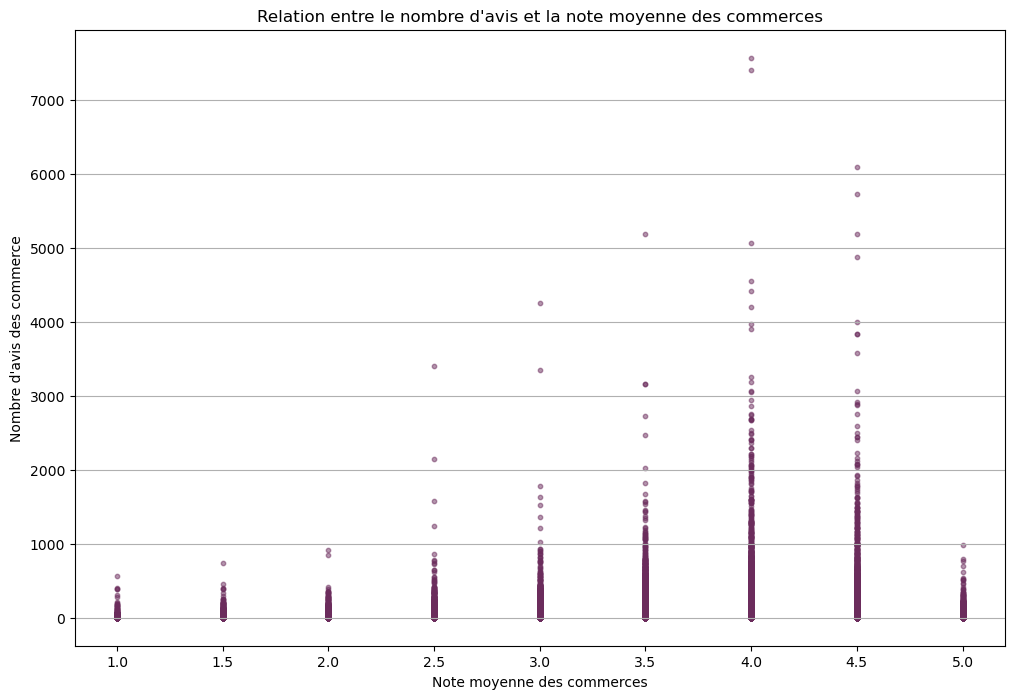

In [ ]:
# représentation graphique de la corrélation
plt.figure(figsize=(12, 8))
plt.scatter(average_stars, reviews_counts, alpha=0.5, s=10, color='#6B2C5C')
plt.ylabel("Nombre d'avis des commerce")
plt.xlabel("Note moyenne des commerces")
plt.title("Relation entre le nombre d'avis et la note moyenne des commerces")
plt.grid(True, axis='y')
plt.show()

On en déduit que le nombre d'avis rédigés par les utilisateurs sur les différents commerces n'influence pas la note moyenne attribuée au commerce.<br> 
Un commerce bien noté peut autant d'avis rédigés qu'un commerce mal noté.<br>
On remarque sur le graphique qu'il y a plus d'avis rédigés sur les commerces ayant une note allant de 2,5 à 4,5 étoiles (notes moyennes on va dire).<br>
### Longueur moyen des avis utilisateurs par classe de note

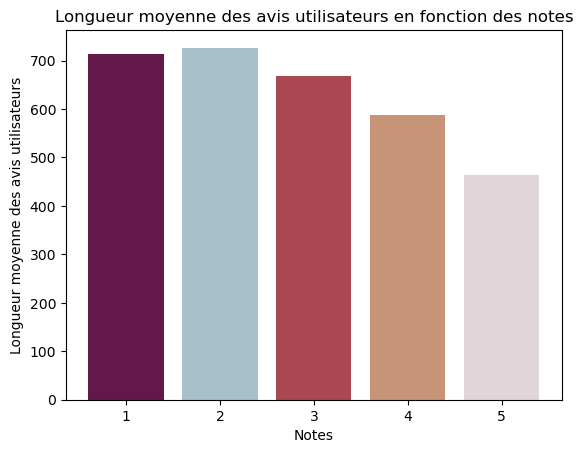

In [11]:
count_reviews = {}
total_len_reviews = {}
for r in reviews:
    stars = r["stars"]
    review_len = len(r["text"])
    if stars != None:
        if stars in count_reviews.keys() and stars in total_len_reviews.keys():
            count_reviews[stars] += 1
            total_len_reviews[stars] += review_len
        else:
            count_reviews[stars] = 1
            total_len_reviews[stars] = review_len

# calculer la longueur moyenne des textes
avg_len_reviews = {}
keys = count_reviews.keys()
for k in keys:
    if k in total_len_reviews.keys() and k != None:
        avg_len_reviews[k] = total_len_reviews[k] / count_reviews[k]

# transformer le dictionnaire en liste de tuples
avg_len_reviews_items = list(avg_len_reviews.items()) # avg_len_reviews_items retourne une liste de tuples (note, longueur moyenne des avis utilisateurs)
stars_list = [avg_len_reviews_items[i][0] for i in range(len(avg_len_reviews_items))] # notes de 1 à 5
avg_stars_list = [avg_len_reviews_items[i][1] for i in range(len(avg_len_reviews_items))] # longueur moyenne des avis utilisateurs par note

# représenter le résultat sous forme de diagramme en bâton
colors = plt.cm.twilight_shifted(np.linspace(0.4, 0.9, len(stars_list)))
plt.bar(stars_list, avg_stars_list, color=colors)
plt.title("Longueur moyenne des avis utilisateurs en fonction des notes")
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne des avis utilisateurs")
plt.show()

On remarque que plus la note du commerce est basse, plus l'avis est long. Cela montre qu'un utilisateur détaille les points négatifs du commerce pour aider les autres utilisateurs à la recommanation.
### Réaction moyenne sur les avis utilisateurs en fonction de la note attibué aux commerces

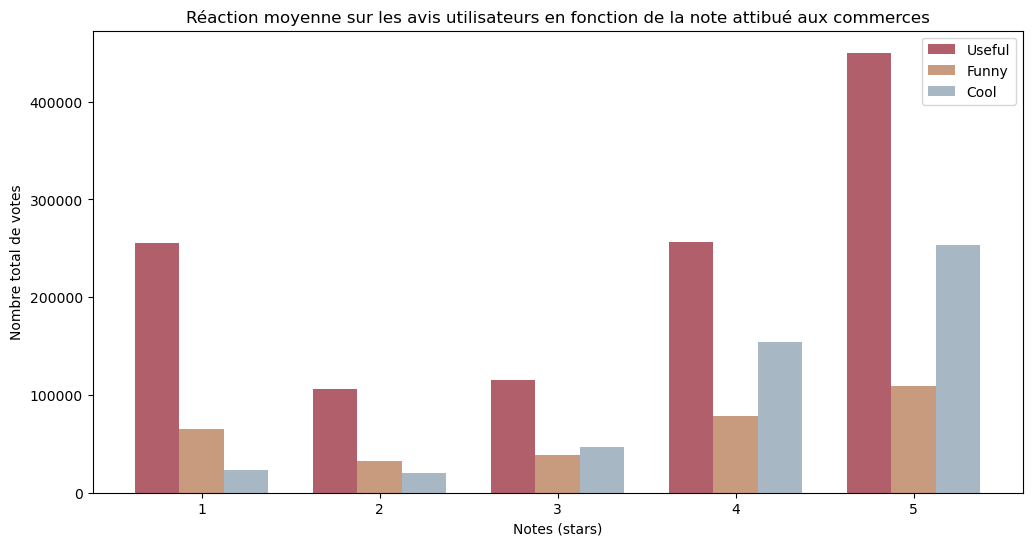

In [12]:
count_useful = {}
count_funny = {}
count_cool = {}

for r in reviews:
    useful = r["useful"]
    funny = r["funny"]
    cool = r["cool"]
    stars = r["stars"]

    if stars is not None:
        count_useful[stars] = count_useful.get(stars, 0) + useful
        count_cool[stars] = count_cool.get(stars, 0) + cool
        count_funny[stars] = count_funny.get(stars, 0) + funny

# extraire les listes
count_useful_items = list(count_useful.items())
count_cool_items = list(count_cool.items())
count_funny_items = list(count_funny.items())

count_useful_list = [count_useful_items[i][1] for i in range(len(count_useful_items))]
count_cool_list = [count_cool_items[i][1] for i in range(len(count_cool_items))]
count_funny_list = [count_funny_items[i][1] for i in range(len(count_funny_items))]

# représentation graphique des données
import numpy as np

stars_array = np.array(stars_list)
width = 0.25  # Largeur des barres

plt.figure(figsize=(12, 6))

# Créer 3 groupes de barres décalées
plt.bar(stars_array - width, count_useful_list, width, label='Useful', color='#B15F6B')
plt.bar(stars_array, count_funny_list, width, label='Funny', color='#C89B7F')
plt.bar(stars_array + width, count_cool_list, width, label='Cool', color='#A7B8C4')

plt.title("Réaction moyenne sur les avis utilisateurs en fonction de la note attibué aux commerces")
plt.xlabel("Notes (stars)")
plt.ylabel("Nombre total de votes")
plt.legend()
plt.show()

On voit sur ce graphique que la plupart des avis sont utiles pour les utilisateurs. Cela montre que la plateforme Yelp est une bonne plateforme de recommandation de commerces à partir d'avis utlisateurs.
### Comparer la moyenne des notes données par les utilisateurs ayant beaucoup d'avis vs peu d'avis

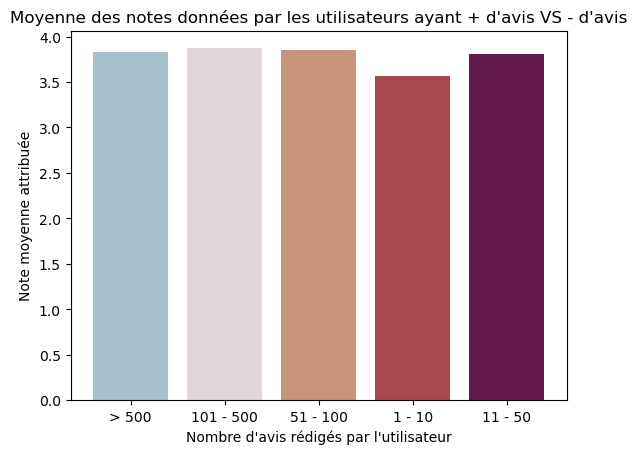

In [13]:
count_users_dict = {}
groups = {}

def remplir_dict(key, stars):
    groups[key] = groups.get(key, 0) + stars
    count_users_dict[key] = count_users_dict.get(key, 0) + 1

for user in users:
    review_count = user["review_count"]
    average_stars = user["average_stars"]

    if review_count is not None and average_stars is not None:
        if review_count > 0 and review_count <= 10:
            remplir_dict("1 - 10", average_stars)
        elif review_count <= 50 and review_count > 10:
            remplir_dict("11 - 50", average_stars)
        elif review_count > 50 and review_count <= 100:
            remplir_dict("51 - 100", average_stars)
        elif review_count > 100 and review_count <= 500:
            remplir_dict("101 - 500", average_stars)
        else:
            remplir_dict("> 500", average_stars)

for k in groups.keys():
    groups[k] = groups[k] / count_users_dict[k]

# visualisation en histogramme
groups_items = list(groups.items())
x = [item[0] for item in groups_items]
y = [item[1] for item in groups_items]

# représenter le résultat sous forme de diagramme en bâton
colors = plt.cm.twilight_shifted(np.linspace(0.4, 0.9, len(x)))
plt.bar(x, y, color=colors)
plt.title("Moyenne des notes données par les utilisateurs ayant + d'avis VS - d'avis")
plt.xlabel("Nombre d'avis rédigés par l'utilisateur")
plt.ylabel("Note moyenne attribuée")
plt.show()

### Longueur des avis en fonction de l'ancienneté / expérience de l'utilisateur

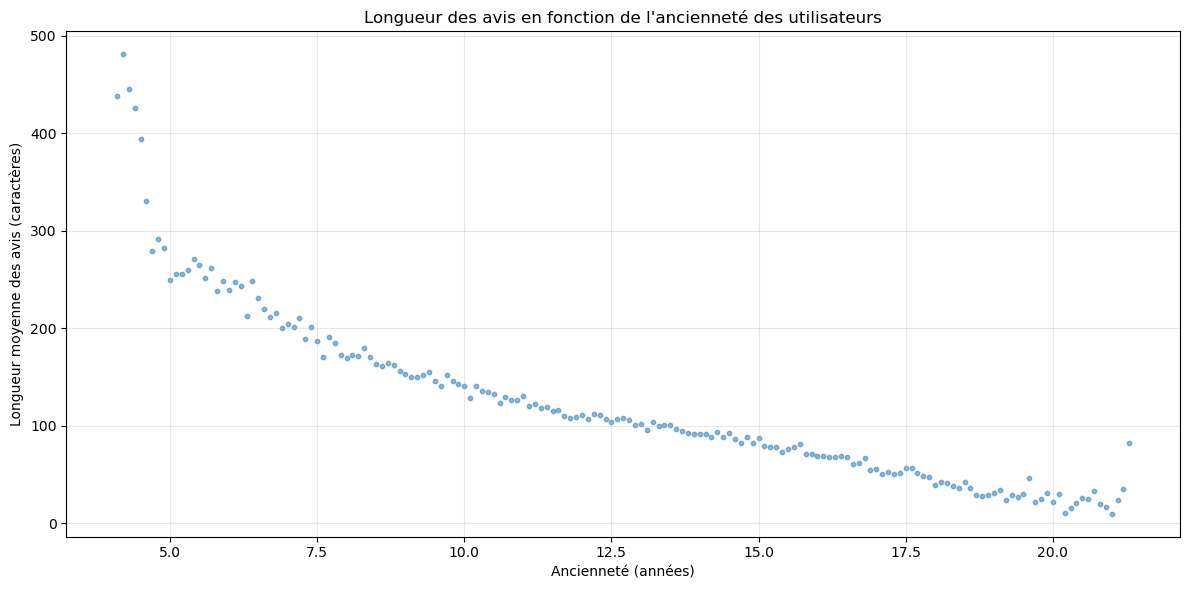

Nombre de groupes d'ancienneté: 173
Ancienneté min: 4.1 ans, max: 21.3 ans
Longueur moyenne min: 10 caractères, max: 481 caractères


In [21]:
import datetime
from collections import defaultdict

# Initialisation des structures de données
user_dict = {}  # user_id -> ancienneté en années
reviews_dict = defaultdict(int)  # user_id -> longueur totale des textes
review_counts = defaultdict(int)  # user_id -> nombre d'avis (déjà dans user.json)

# Structure pour regrouper par ancienneté
anciennete_data = defaultdict(list)  # ancienneté (années) -> [longueur_moyenne_par_avis]

# 1. Traitement des utilisateurs
for u in users:
    user_id = u["user_id"]
    yelping_since = u["yelping_since"][:10]
    
    # Extraction de la date
    annee = int(yelping_since[:4])
    mois = int(yelping_since[5:7])
    jour = int(yelping_since[8:])
    
    # Calcul de l'ancienneté en années
    date_inscription = datetime.date(annee, mois, jour)
    anciennete_jours = (datetime.date.today() - date_inscription).days
    anciennete_annees = anciennete_jours / 365.25  # Plus précis avec 365.25
    
    user_dict[user_id] = anciennete_annees
    review_counts[user_id] = u["review_count"]

# 2. Traitement des avis
for r in reviews:
    user_id = r["user_id"]
    len_text = len(r["text"])
    
    reviews_dict[user_id] += len_text

# 3. Calcul des moyennes par utilisateur et regroupement par ancienneté
for user_id in user_dict:
    if review_counts[user_id] > 0 and user_id in reviews_dict:
        anciennete_annees = user_dict[user_id]
        longueur_moyenne = reviews_dict[user_id] / review_counts[user_id]
        
        # Arrondir l'ancienneté pour mieux regrouper
        anciennete_arrondie = round(anciennete_annees, 1)  # Regrouper par dixième d'année
        
        anciennete_data[anciennete_arrondie].append(longueur_moyenne)

# 4. Préparation des données pour visualisation
# Calcul de la longueur moyenne par groupe d'ancienneté
data_for_plot = []
for anciennete in sorted(anciennete_data.keys()):
    moyennes = anciennete_data[anciennete]
    if len(moyennes) > 0:  # Éviter les groupes vides
        moyenne_groupe = sum(moyennes) / len(moyennes)
        data_for_plot.append((anciennete, moyenne_groupe))

# 5. Visualisation
x = [d[0] for d in data_for_plot]
y = [d[1] for d in data_for_plot]

plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.5, s=10)
plt.xlabel('Ancienneté (années)')
plt.ylabel('Longueur moyenne des avis (caractères)')
plt.title('Longueur des avis en fonction de l\'ancienneté des utilisateurs')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Nombre de groupes d'ancienneté: {len(data_for_plot)}")
print(f"Ancienneté min: {min(x):.1f} ans, max: {max(x):.1f} ans")
print(f"Longueur moyenne min: {min(y):.0f} caractères, max: {max(y):.0f} caractères")